# Telecom Customer Churn Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('customer_churn_data.csv')
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [58]:
data.shape

(1000, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


## Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploring Age Feature

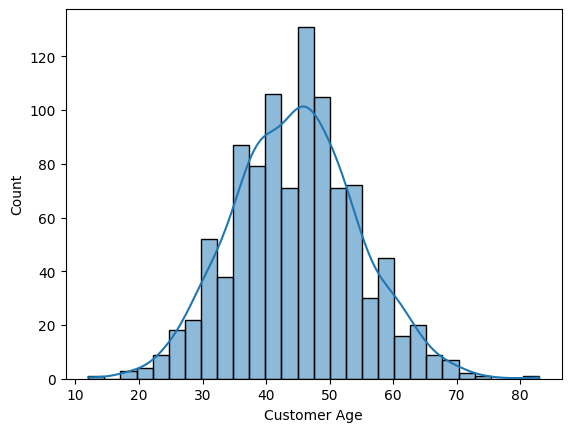

In [5]:
sns.histplot(data=data, x=data['Age'], kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

In [6]:
age_data = data[['Age', 'Churn']]

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_data['Age_Range'] = pd.cut(data['Age'], bins=bins, labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

C:\Users\Tyron\AppData\Local\Temp\ipykernel_31996\1513678635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age_Range'] = pd.cut(data['Age'], bins=bins, labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])


C:\Users\Tyron\AppData\Local\Temp\ipykernel_31996\1244336764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_counts = age_data.groupby(['Age_Range', 'Churn']).size().reset_index(name='Counts')


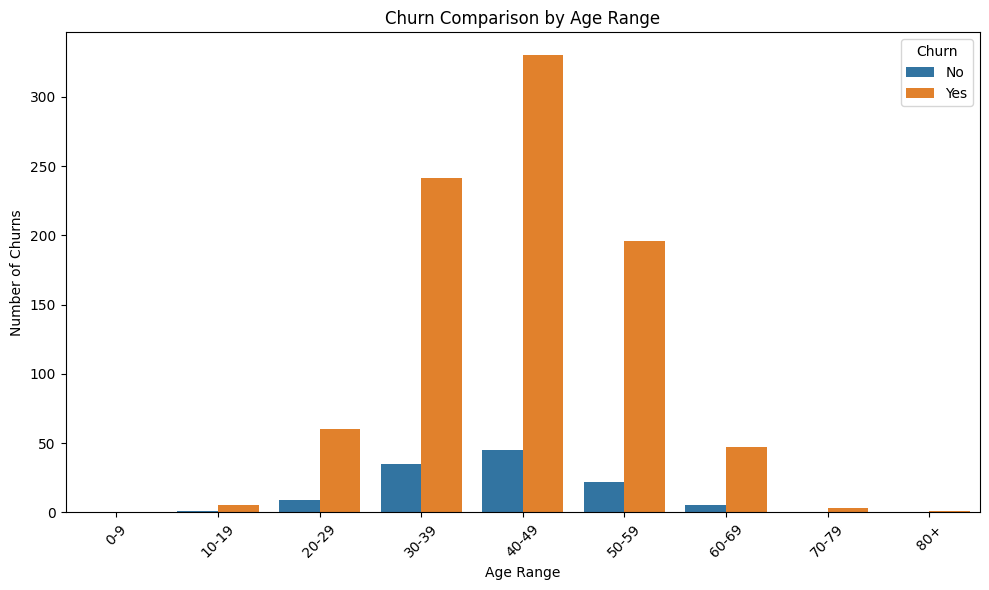

In [7]:
age_churn_counts = age_data.groupby(['Age_Range', 'Churn']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Range', y='Counts', hue='Churn', data=age_churn_counts)

plt.title('Churn Comparison by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Churns')
plt.xticks(rotation=45)  
plt.legend(title='Churn')

plt.tight_layout()
plt.show()


### Insights:
It seems that the age feature follows a rather normal distribution, and the age range of 40-49 seems to be where the most churning is taking place with the percentage of churning being higher in that age range

### Exploring Gender Feature

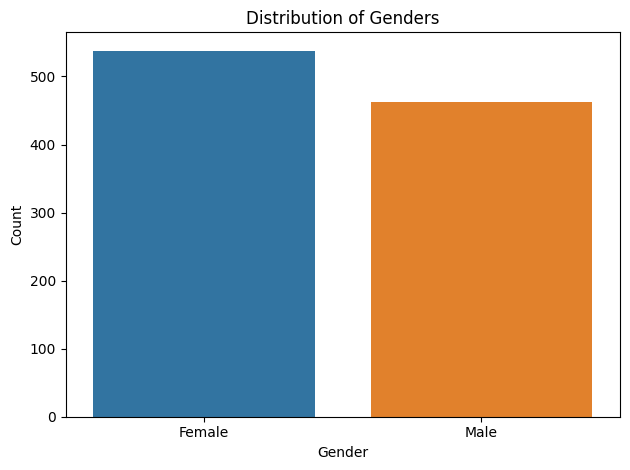

In [8]:
gender_counts = data['Gender'].value_counts().reset_index()
sns.barplot(data=gender_counts, x='Gender', y='count', hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.tight_layout()
plt.show()

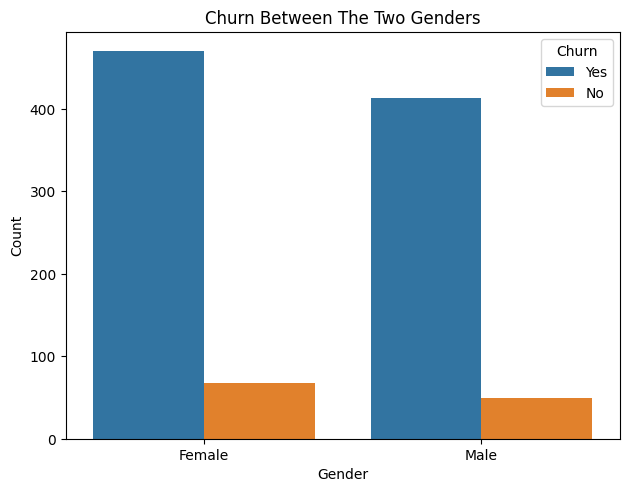

In [9]:
gender_churn_counts = data[['Gender', 'Churn']].value_counts().reset_index()
sns.barplot(data=gender_churn_counts, x='Gender', y='count', hue='Churn')
plt.tight_layout()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Between The Two Genders')
plt.show()

### Insights:
The gender feature is a bit unevenly distributed so some sampling might be nescessary to create a fair representation, from inspecting the data it seems that the genders both have similar churn rates. 

### Exploring Tenure Feature

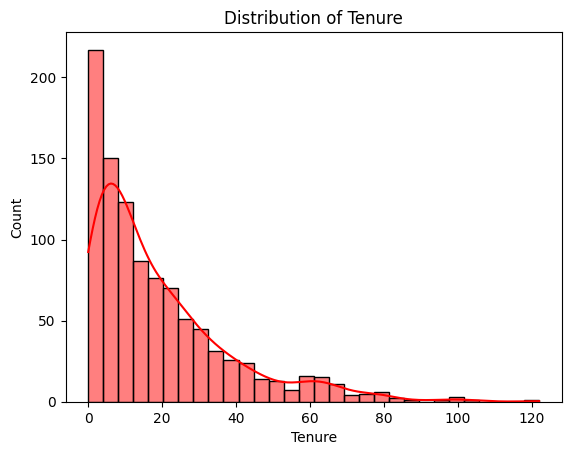

In [10]:
sns.histplot(data=data, x='Tenure', color='red', kde=True)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

In [11]:
tenure_bins = [-1, 20, 40, 60, 80, 100, 120, np.inf]
tenure_labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120+']
data['Tenure_Ranges'] = pd.cut(data['Tenure'], bins=tenure_bins, labels=tenure_labels)
data[['Tenure', 'Tenure_Ranges']]

,Tenure,Tenure_Ranges
0,4,0-19
1,0,0-19
2,2,0-19
3,8,0-19
4,32,20-39
...,...,...
995,41,40-59
996,9,0-19
997,15,0-19
998,68,60-79


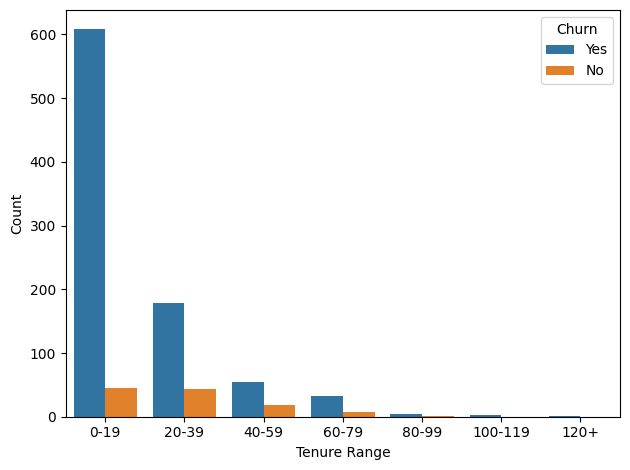

In [12]:
tenure_ranges_churn_counts = data[['Tenure_Ranges', 'Churn']].value_counts().reset_index()
sns.barplot(data=tenure_ranges_churn_counts, x='Tenure_Ranges', y='count', hue='Churn')
plt.tight_layout()
plt.xlabel('Tenure Range')
plt.ylabel('Count')
plt.show()

### Insight: 
Churn seems to happen most during tenure ranges of 0 to 60 which is to be expected as higher tenure ranges mean loyal customers who stick around longer.

### Exploring MonthlyCharges Feature

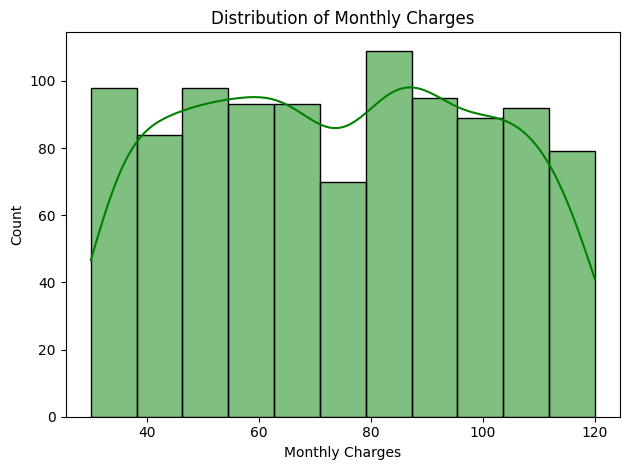

In [13]:
sns.histplot(data=data, x='MonthlyCharges', kde=True, color='green')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges')
plt.tight_layout()
plt.show()

In [14]:
monthly_charges_bins = [-1, 20, 40, 60, 80, 100, 120, np.inf]
monthly_charges_labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120+']
data['Monthly_Charges_Bins'] = pd.cut(data['MonthlyCharges'], bins=monthly_charges_bins, labels=monthly_charges_labels)
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Tenure_Ranges,Monthly_Charges_Bins
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,0-19,80-99
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes,0-19,20-39
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,0-19,60-79
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,0-19,100-119
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes,20-39,60-79
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,40-59,20-39
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes,0-19,80-99
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes,0-19,100-119
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes,60-79,60-79


In [15]:
data[['Monthly_Charges_Bins', 'Churn']].value_counts().reset_index()

,Monthly_Charges_Bins,Churn,count
0,80-99,Yes,218
1,100-119,Yes,211
2,40-59,Yes,186
3,60-79,Yes,171
4,20-39,Yes,97
5,40-59,No,38
6,60-79,No,37
7,80-99,No,25
8,20-39,No,17


### Exploring ContractType Feature

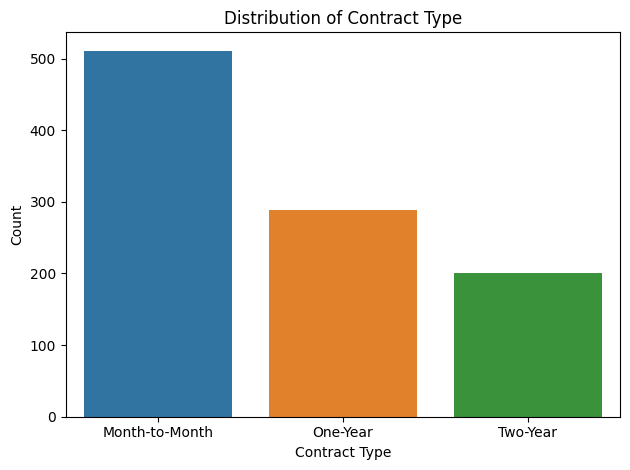

In [16]:
contractType = data['ContractType'].value_counts().reset_index()
sns.barplot(data=contractType, x='ContractType', y='count', hue='ContractType')
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

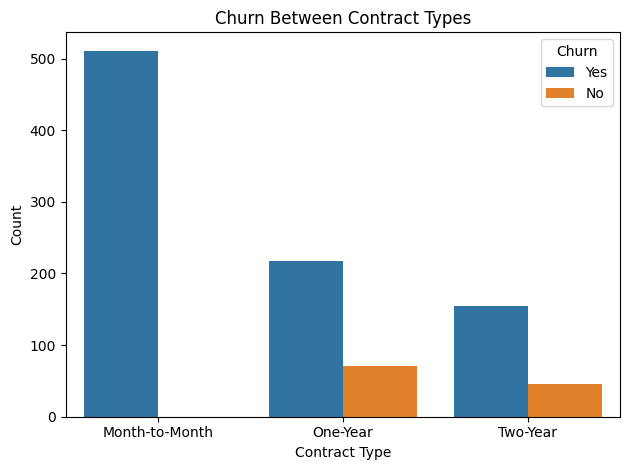

In [17]:
contractType_Churn_counts = data[['ContractType', 'Churn']].value_counts().reset_index()
sns.barplot(data=contractType_Churn_counts, x='ContractType', y='count', hue='Churn')
plt.title('Churn Between Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insight: 

### Exploring InternetService Feature

In [18]:
print(f'Total NaN values in InternetService Feature: {data['InternetService'].isna().sum()}')

Total NaN values in InternetService Feature: 297


In [19]:
internetService_mapping = {
    'Fiber Optic' : 'Fiber Optic',
    'DSL' : 'DSL',
    np.nan : 'N/A'
}

data['InternetService'] = data['InternetService'].map(internetService_mapping)

In [20]:
data[data['InternetService'] != 'N/A']

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Tenure_Ranges,Monthly_Charges_Bins
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,0-19,80-99
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes,0-19,20-39
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,0-19,60-79
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,0-19,100-119
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes,0-19,100-119
...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes,20-39,80-99
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes,0-19,100-119
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes,0-19,60-79
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,40-59,20-39


### Exploring TotalCharges Feature

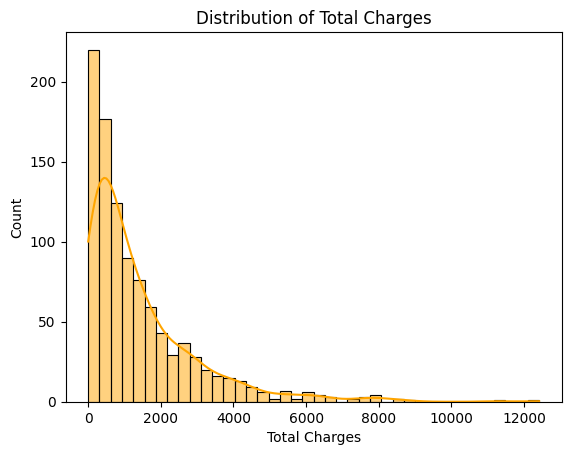

In [21]:
sns.histplot(data=data, x='TotalCharges', color='orange', kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

In [22]:
total_charges_bins = [-1, 2000, 4000, 6000, 8000, 10000, 12000, np.inf]
total_charges_labels = ['0-1999', '2000-3999', '4000-5999', '6000-7999', '8000-9999', '10000-11999', '+12000']

data['TotalCharges_Ranges'] = pd.cut(data['TotalCharges'], bins=total_charges_bins, labels=total_charges_labels)

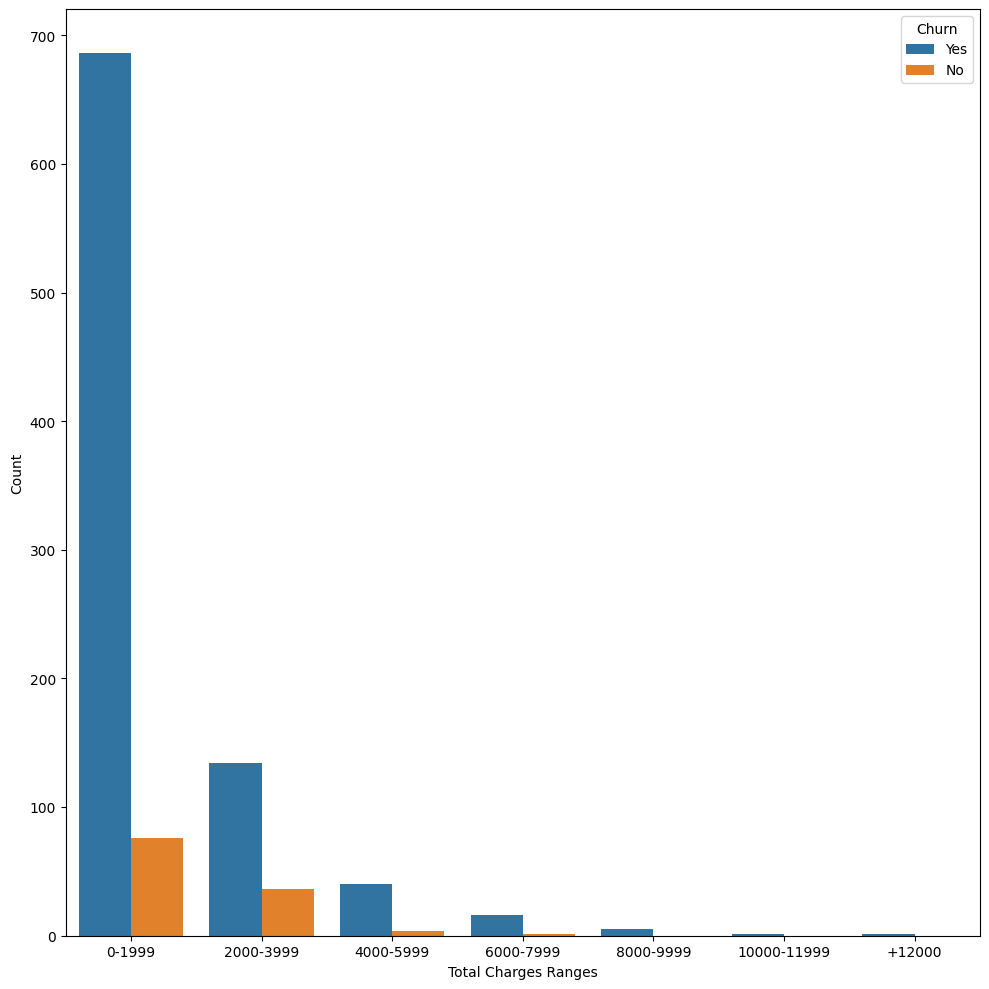

In [23]:
total_charges_ranges_churn_counts = data[['TotalCharges_Ranges', 'Churn']].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=total_charges_ranges_churn_counts, x='TotalCharges_Ranges', y='count', hue='Churn')
plt.tight_layout()
plt.xlabel('Total Charges Ranges')
plt.ylabel('Count')
plt.show()

### Insights: 

It seems that churn happens mostly in lower total charges ranges, but this can be expected as longer tenure ranges means customer loyalty and loyal customers will have higher total charges 

### Exploring TechSupport Feature

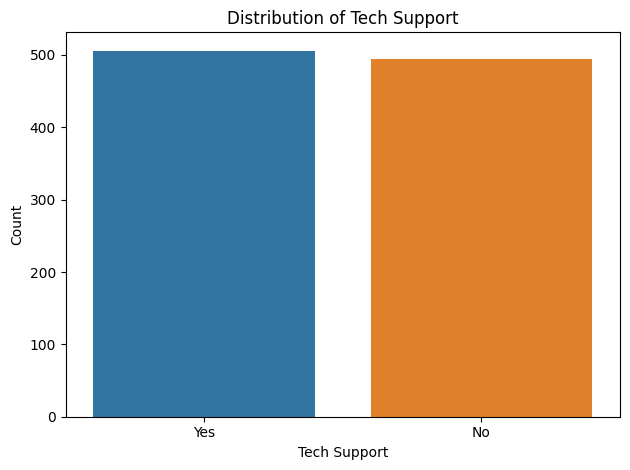

In [24]:
TechSupport_counts = data['TechSupport'].value_counts().reset_index()
sns.barplot(data=TechSupport_counts, x='TechSupport', y='count', hue='TechSupport')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Distribution of Tech Support')
plt.tight_layout()
plt.show()

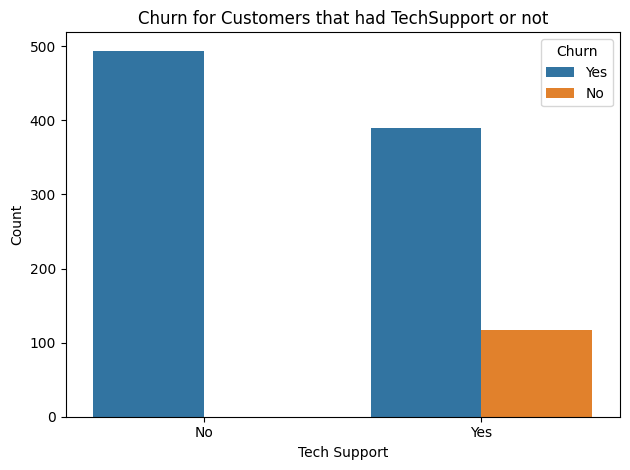

In [25]:
TechSupport_churn_counts = data[['TechSupport', 'Churn']].value_counts().reset_index()
sns.barplot(data=TechSupport_churn_counts, x='TechSupport', y='count', hue='Churn')
plt.title('Churn for Customers that had TechSupport or not')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insight:
Customers who did not have Tech Support seem to all have churned away from the company which is different compared to the customers who have had tech support.

### Exploring Churn Feature

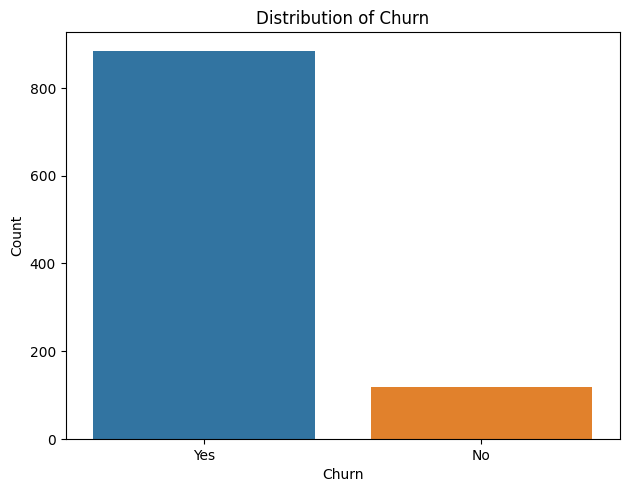

In [26]:
churn_value_counts = data['Churn'].value_counts().reset_index()
sns.barplot(data=churn_value_counts, x='Churn', y='count', hue='Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.title('Distribution of Churn')
plt.show()

## Data Engineering and Preparation

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop(['CustomerID', 'Churn', 'Tenure_Ranges', 'Monthly_Charges_Bins', 'TotalCharges_Ranges'], axis=1)
y = data[['Churn']]

X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [29]:
print(f'X Train Dataset Shape: {X_train.shape}')
print(f'X Test Dataset Shape: {X_test.shape}')
print(f'Y Train Dataset Shape: {y_train.shape}')
print(f'Y Test Dataset Shape: {y_test.shape}')

X Train Dataset Shape: (750, 8)
X Test Dataset Shape: (250, 8)
Y Train Dataset Shape: (750, 1)
Y Test Dataset Shape: (250, 1)


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 82 to 102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              750 non-null    int64  
 1   Gender           750 non-null    object 
 2   Tenure           750 non-null    int64  
 3   MonthlyCharges   750 non-null    float64
 4   ContractType     750 non-null    object 
 5   InternetService  750 non-null    object 
 6   TotalCharges     750 non-null    float64
 7   TechSupport      750 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 52.7+ KB


In [31]:
X_numeric = X_train.select_dtypes(['int64', 'float64']).columns
Scalar = StandardScaler()

X_train[X_numeric] = Scalar.fit_transform(X_train[X_numeric])
X_train.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
82,1.443377,Male,-0.408932,-1.427236,Month-to-Month,N/A,-0.627189,No
991,-2.139473,Male,0.710407,0.307048,Month-to-Month,Fiber Optic,0.830485,Yes
789,-1.730005,Female,0.177389,-1.528185,One-Year,Fiber Optic,-0.388380,Yes
894,1.341010,Male,-0.622139,0.933251,Month-to-Month,Fiber Optic,-0.450481,Yes
398,-0.194498,Male,2.522671,-0.515928,Month-to-Month,N/A,1.761704,No


In [32]:
X_Cat = X.select_dtypes('object').columns
OHE = OneHotEncoder()
X_Cat_transformed = OHE.fit_transform(X_train[X_Cat]).toarray()
X_Cat_transformed = pd.DataFrame(X_Cat_transformed, columns=OHE.get_feature_names_out())
X_Cat_transformed.head()

,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_N/A,TechSupport_No,TechSupport_Yes
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [33]:
X_train = pd.concat([X_train[X_numeric].reset_index(), X_Cat_transformed.reset_index()], axis=1)
X_train = X_train.drop(['index'], axis=1)
X_train.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_N/A,TechSupport_No,TechSupport_Yes
0,1.443377,-0.408932,-1.427236,-0.627189,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-2.139473,0.710407,0.307048,0.830485,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.730005,0.177389,-1.528185,-0.388380,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.341010,-0.622139,0.933251,-0.450481,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.194498,2.522671,-0.515928,1.761704,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
X_test_numeric = X_test.select_dtypes(['int64', 'float64']).columns
X_test[X_test_numeric] = Scalar.fit_transform(X_test[X_test_numeric])
X_test.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
521,0.610559,Female,-1.034327,1.086426,Two-Year,Fiber Optic,-0.878373,No
737,1.017327,Female,-0.930249,1.656525,One-Year,DSL,-0.740437,Yes
740,-1.830049,Male,-0.461898,1.605175,One-Year,N/A,-0.128435,No
660,-0.508053,Female,0.318687,1.433508,Month-to-Month,Fiber Optic,0.825385,Yes
411,-1.118205,Male,-0.722093,-0.755806,Month-to-Month,DSL,-0.687750,Yes


In [35]:
X_test_cat_transformed = OHE.fit_transform(X_test.select_dtypes('object')).toarray()
X_test_cat_transformed = pd.DataFrame(X_test_cat_transformed, columns=OHE.get_feature_names_out())
X_test_cat_transformed.head()

,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_N/A,TechSupport_No,TechSupport_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
X_test = pd.concat([X_test[X_test_numeric].reset_index(), X_test_cat_transformed.reset_index()], axis=1)
X_test = X_test.drop(['index'], axis=1)
X_test.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_N/A,TechSupport_No,TechSupport_Yes
0,0.610559,-1.034327,1.086426,-0.878373,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.017327,-0.930249,1.656525,-0.740437,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.830049,-0.461898,1.605175,-0.128435,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.508053,0.318687,1.433508,0.825385,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.118205,-0.722093,-0.755806,-0.687750,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model Creation

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
Model = LogisticRegression()
Model.fit(X_train, y_train)

c:\Users\Tyron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Model Evaluation

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
n_folds = 5
kfolds = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [40]:
y_pred = Model.predict(X_test)

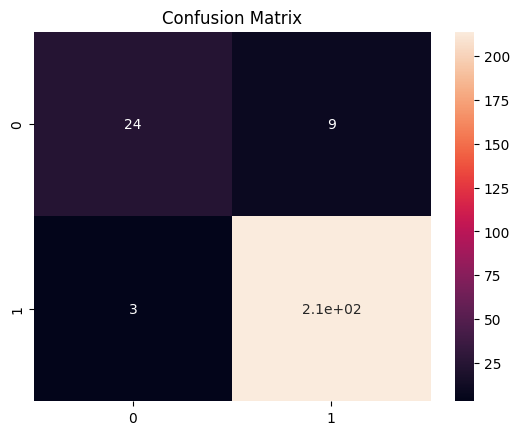

In [41]:
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [42]:
class_report = classification_report(y_true=y_test, y_pred=y_pred)
print(f'Classification Report: {class_report}')

Classification Report:               precision    recall  f1-score   support

          No       0.89      0.73      0.80        33
         Yes       0.96      0.99      0.97       217

    accuracy                           0.95       250
   macro avg       0.92      0.86      0.89       250
weighted avg       0.95      0.95      0.95       250



In [43]:
acc_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy Score: {acc_score}')

Accuracy Score: 0.952


In [57]:
cross_validation_score = np.mean(cross_val_score(Model, X=X_test, y=y_test['Churn'], cv=kfolds))
print(f'Cross Validation Score on Test Set: {cross_validation_score:.2f}')

Cross Validation Score on Test Set: 0.91


# Conclusion

### a Logistic Regression Model with the accuracy score of 95% on test set and 91% on cross validation of test set was created to accurately predict whether a customer will churn or not